<a href="https://colab.research.google.com/github/irfannhkm/PCVK_GANJIL_24-25/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRAKTIKUM

In [ ]:
# Akses folder images pada Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import library
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan tingkat kecerahan (0-255): 50


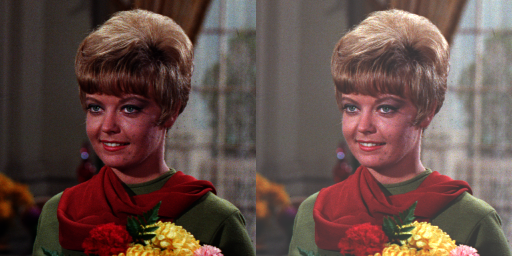

In [ ]:
# Transformasi linier brightness
print(" Mengubah tingkat kecerahan citra ")
print("----------------------------------")
try:
  brightness = int(input("Masukkan tingkat kecerahan (0-255): "))
  if brightness < 0 or brightness > 255:
    raise ValueError
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.tiff')
brightness_img = np.zeros(original.shape, original.dtype)

# akses per pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_img[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa loop
# brightness_img = cv.convertScaleAbs(original, brightness)
final_frame = cv.hconcat([original, brightness_img])
cv2_imshow(final_frame)

# TUGAS PRAKTIKUM

## 1. Implementasikan inverse citra

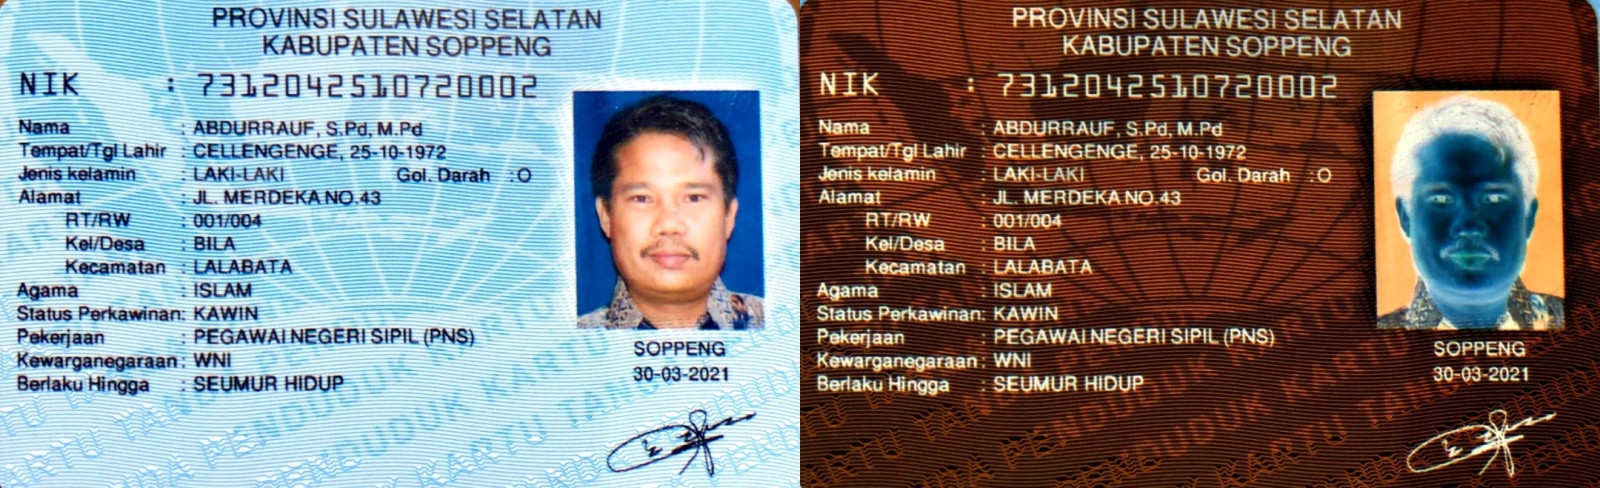

In [ ]:
original =  cv.imread('/content/drive/MyDrive/PCVK/KTP7.jpeg')

invers = 255-(original)

# cara cepat:
# invers = cv.bitwise_not(original)

final_frame = cv.hconcat([original, invers])
cv2_imshow(final_frame)

## 2. Implementasikan transformasi contrast

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan (-255 - 255): 50
Masukkan tingkat kontras (1.0 - 3.0): 2


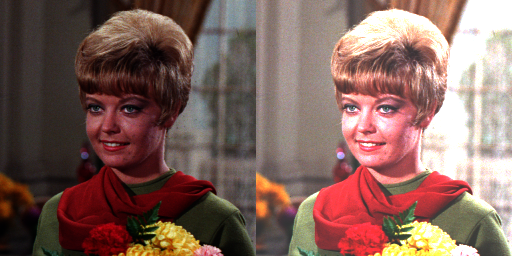

In [ ]:
print(" Mengubah kontras dan tingkat kecerahan citra ")
print("----------------------------------------------")
try:
  brightness = int(input("Masukkan tingkat kecerahan (-255 - 255): "))
  contrast = int(input("Masukkan tingkat kontras (1.0 - 3.0): "))
  # if brightness < -255 or brightness > 255:
  #   raise ValueError
  # if contrast < 1 or contrast > 3:
  #   raise ValueError
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.tiff')
result = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      result[y,x,c] = np.clip(contrast * (original[y,x,c]) + brightness, -255, 255)

final_frame = cv.hconcat((original, result))
cv2_imshow(final_frame)

## 3. Implementasikan transformasi logarithmic brightness

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------
Masukkan tingkat kecerahan: 50


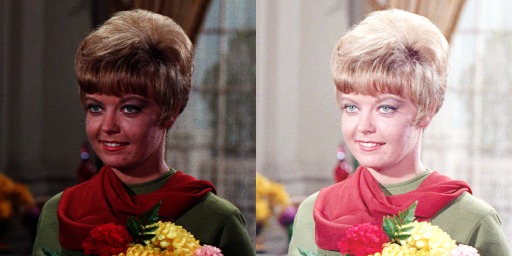

In [ ]:
import math as m
print(" Mengubah tingkat kecerahan citra dengan Transformasi Log ")
print("----------------------------------------------")
try:
  brightness = int(input("Masukkan tingkat kecerahan: "))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/female.tiff')
result = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      result[y,x,c] = np.clip(brightness * m.log(1 + original[y,x,c]), 0, 255)

final_frame = cv.hconcat((original, result))
cv2_imshow(final_frame)

## 4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance

### a). Grayscale Averaging

Transformasi grayscale dengan metode average 
---------------------------------------------


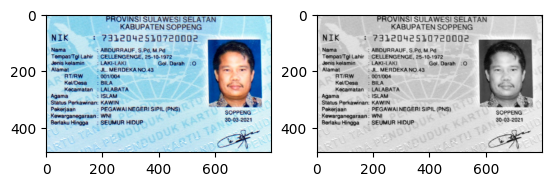

In [ ]:
# Average
print('Transformasi grayscale dengan metode average ')
print('---------------------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK/KTP7.jpeg')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
result = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    result[y,x] = np.mean(original[y,x])

final_frame = plt.subplot(1,2,1)
plt.imshow(original)
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

### b). Grayscale Lightness

Transformasi grayscale dengan metode lightness 
-----------------------------------------------


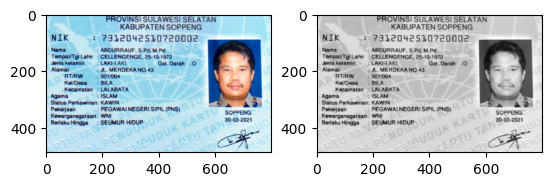

In [ ]:
# Lightness
print('Transformasi grayscale dengan metode lightness ')
print('-----------------------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK/KTP7.jpeg')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
result = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    R, G, B = original[y,x]
    result[y,x] = (max(R, G, B)/2 + min(R, G, B)/2)

final_frame = plt.subplot(1,2,1)
plt.imshow(original)
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()

### c). Grayscale Luminance

Transformasi grayscale dengan metode luminance 
-----------------------------------------------


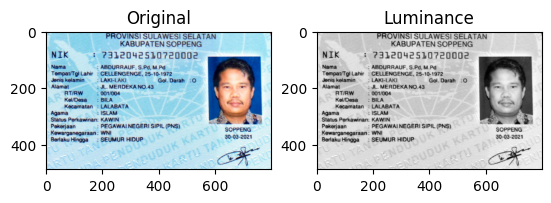

In [ ]:
# Luminance
print('Transformasi grayscale dengan metode luminance ')
print('-----------------------------------------------')

original = cv.imread('/content/drive/MyDrive/PCVK/KTP7.jpeg')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)

result = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    R, G, B = original[y, x]
    result[y, x] = 0.21 * R + 0.72 * G + 0.07 * B


# menampilkan dalam satu baris
final_frame = plt.subplot(1,2,1)
plt.imshow(original)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(result)
plt.title('Luminance')
plt.show()


## 5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale.

Menampilkan warna biru pada citra, dan mengubah warna lain menjadi grayscale
--------------------------------------------------------------------------------------


(-0.5, 799.5, 487.5, -0.5)

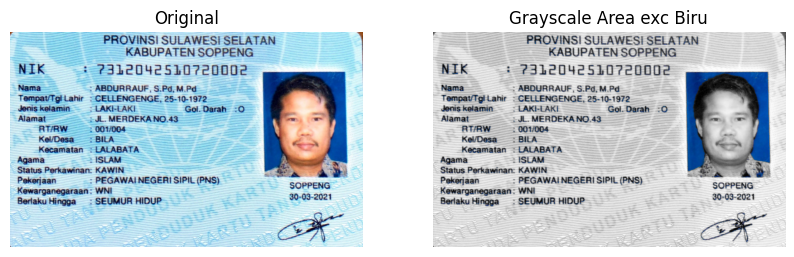

In [64]:
print('Menampilkan warna biru pada citra, dan mengubah warna lain menjadi grayscale')
print('--------------------------------------------------------------------------------------')

path = cv.imread('/content/drive/MyDrive/PCVK/KTP7.jpeg')
original = cv.cvtColor(path, cv.COLOR_BGR2RGB)

result = np.zeros(original.shape, original.dtype)

tinggi, lebar, _ = original.shape
for y in range(tinggi):
  for x in range(lebar):
    r, g, b = original[y, x]

    if (r <= 100 and g <= 100 and b >= 100):
      result[y, x] = original[y, x]
    else:
      gray_value = int(0.21 * r + 0.72 * g + 0.07 * b)
      result[y, x] = [gray_value, gray_value, gray_value]

# Menampilkan gambar asli dan gambar dengan warna tertentu
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(original)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Grayscale Area exc Biru')
plt.imshow(result)
plt.axis('off')

## Tugas tambahan

Menampilkan warna merah dan biru pada citra, dan mengubah warna lain menjadi grayscale
--------------------------------------------------------------------------------------


(-0.5, 511.5, 511.5, -0.5)

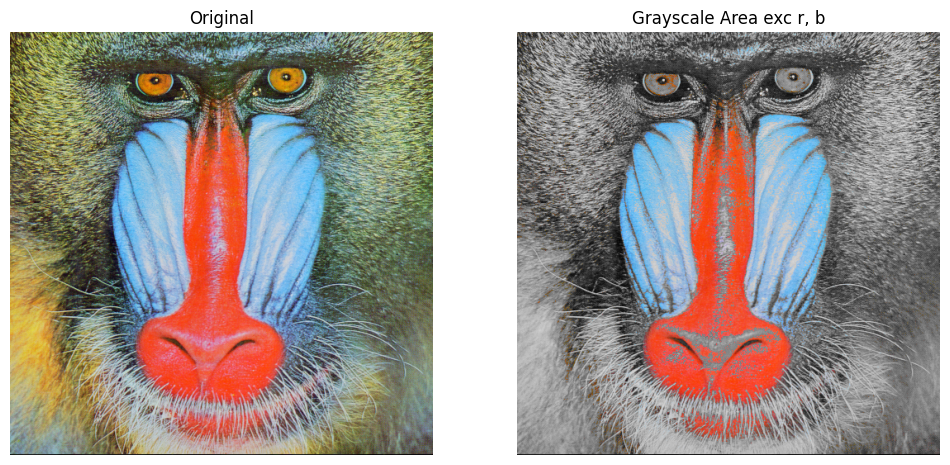

In [62]:
print('Menampilkan warna merah dan biru pada citra, dan mengubah warna lain menjadi grayscale')
print('--------------------------------------------------------------------------------------')

path = cv.imread('/content/drive/MyDrive/mandrill.tiff')
original = cv.cvtColor(path, cv.COLOR_BGR2RGB)

result = np.zeros(original.shape, original.dtype)

tinggi, lebar, _ = original.shape
for y in range(tinggi):
  for x in range(lebar):
    r, g, b = original[y, x]

    if (r <= 200 and g <= 200 and b >= 200) or (r >= 100 and g <= 100 and b <= 100):
      result[y, x] = original[y, x]
    else:
      gray_value = int(0.21 * r + 0.72 * g + 0.07 * b)
      result[y, x] = [gray_value, gray_value, gray_value]

# Menampilkan gambar asli dan gambar dengan warna tertentu
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title('Original')
plt.imshow(original)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Grayscale Area exc r, b')
plt.imshow(result)
plt.axis('off')